In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
crop=pd.read_csv("C:/Users/HP/Downloads/Annual_Crop_Data (1).csv")
crop.head()

,CD_ID,YEAR,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD
0,0,1965-12-31,Barley,Alberta,1372000,1372000,2504000,1825
1,1,1965-12-31,Barley,Canada,2476800,2476800,4752900,1920
2,2,1965-12-31,Barley,Saskatchewan,708000,708000,1415000,2000
3,3,1965-12-31,Canola,Alberta,297400,297400,215500,725
4,4,1965-12-31,Canola,Canada,580700,580700,512600,885


#### Objective
##### To analyze long-term agricultural production trends across regions and crop types, identify efficiency gaps, quantify land losses, and evaluate which regions and crops deliver sustainable productivity.

## ----------------------------------------

### Checking Data Quality

In [2]:
crop.notna().sum()

CD_ID             672
YEAR              672
CROP_TYPE         672
GEO               672
SEEDED_AREA       672
HARVESTED_AREA    672
PRODUCTION        672
AVG_YIELD         672
dtype: int64

In [3]:
crop.duplicated().sum()

np.int64(0)

In [4]:
crop.columns=crop.columns.str.strip()

In [11]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CD_ID           672 non-null    int64 
 1   YEAR            672 non-null    object
 2   CROP_TYPE       672 non-null    object
 3   GEO             672 non-null    object
 4   SEEDED_AREA     672 non-null    int64 
 5   HARVESTED_AREA  672 non-null    int64 
 6   PRODUCTION      672 non-null    int64 
 7   AVG_YIELD       672 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 42.1+ KB


In [10]:
crop.dtypes

CD_ID              int64
YEAR              object
CROP_TYPE         object
GEO               object
SEEDED_AREA        int64
HARVESTED_AREA     int64
PRODUCTION         int64
AVG_YIELD          int64
dtype: object

In [3]:
def column_analyse(crop,columns):
    for col in columns:
        print(f'\nColumn: {col}')
        print('Unique Values', crop[col].unique())
        print('Value Counts' ,crop[col].value_counts())
        

In [4]:
column_analyse(crop,['CROP_TYPE','GEO'])


Column: CROP_TYPE
Unique Values ['Barley' 'Canola' 'Rye' 'Wheat']
Value Counts CROP_TYPE
Barley    168
Canola    168
Rye       168
Wheat     168
Name: count, dtype: int64

Column: GEO
Unique Values ['Alberta' 'Canada' 'Saskatchewan']
Value Counts GEO
Alberta         224
Canada          224
Saskatchewan    224
Name: count, dtype: int64


#### *Checking all seeded area is harvested*
##### *I am going to analyse this because there will be situation that leads to difference such diseases attcks,pest affect the crop eg animals and natral disasters eg floods and high temperature*

In [5]:
crop['Area_Loss']=crop['SEEDED_AREA']-crop['HARVESTED_AREA']
crop.tail()

,CD_ID,YEAR,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD,Area_Loss
667,667,2020-12-31,Rye,Canada,236700,153000,487800,3188,83700
668,668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572,10800
669,669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750,69600
670,670,2020-12-31,Wheat,Canada,10193600,10017800,35183000,3512,175800
671,671,2020-12-31,Wheat,Saskatchewan,5203700,5175400,15984200,3088,28300


In [6]:
## Yield efficiency (production relative to seeded area) 
crop['YIELD_EFFICIENCY'] = crop['PRODUCTION'] / crop['SEEDED_AREA']

In [7]:
crop.tail()

,CD_ID,YEAR,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD,Area_Loss,YIELD_EFFICIENCY
667,667,2020-12-31,Rye,Canada,236700,153000,487800,3188,83700,2.060837
668,668,2020-12-31,Rye,Saskatchewan,58200,47400,122000,2572,10800,2.096220
669,669,2020-12-31,Wheat,Alberta,3014300,2944700,11041000,3750,69600,3.662874
670,670,2020-12-31,Wheat,Canada,10193600,10017800,35183000,3512,175800,3.451479
671,671,2020-12-31,Wheat,Saskatchewan,5203700,5175400,15984200,3088,28300,3.071699


In [8]:
crop['YEAR']=pd.to_datetime(crop['YEAR'])
crop['year']=crop['YEAR'].dt.year

In [9]:
crops=crop.drop(columns='YEAR')
crops.head()

,CD_ID,CROP_TYPE,GEO,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD,Area_Loss,YIELD_EFFICIENCY,year
0,0,Barley,Alberta,1372000,1372000,2504000,1825,0,1.825073,1965
1,1,Barley,Canada,2476800,2476800,4752900,1920,0,1.918968,1965
2,2,Barley,Saskatchewan,708000,708000,1415000,2000,0,1.998588,1965
3,3,Canola,Alberta,297400,297400,215500,725,0,0.724613,1965
4,4,Canola,Canada,580700,580700,512600,885,0,0.882728,1965


In [10]:
numeric_cols = ['SEEDED_AREA','HARVESTED_AREA','PRODUCTION','AVG_YIELD','Area_Loss'] 
crops[numeric_cols] = crops[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [11]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CD_ID             672 non-null    int64  
 1   CROP_TYPE         672 non-null    object 
 2   GEO               672 non-null    object 
 3   SEEDED_AREA       672 non-null    int64  
 4   HARVESTED_AREA    672 non-null    int64  
 5   PRODUCTION        672 non-null    int64  
 6   AVG_YIELD         672 non-null    int64  
 7   Area_Loss         672 non-null    int64  
 8   YIELD_EFFICIENCY  672 non-null    float64
 9   year              672 non-null    int32  
dtypes: float64(1), int32(1), int64(6), object(2)
memory usage: 50.0+ KB


In [12]:
crops.describe()

,CD_ID,SEEDED_AREA,HARVESTED_AREA,PRODUCTION,AVG_YIELD,Area_Loss,YIELD_EFFICIENCY,year
count,672.000000,6.720000e+02,6.720000e+02,6.720000e+02,672.000000,6.720000e+02,672.000000,672.00000
mean,335.500000,2.972040e+06,2.887188e+06,6.286068e+06,2103.642857,8.485274e+04,1.923914,1992.50000
std,194.133974,3.237981e+06,3.199126e+06,7.232509e+06,738.061131,1.551599e+05,0.676233,16.17527
min,0.000000,1.600000e+04,7.800000e+03,1.610000e+04,725.000000,0.000000e+00,0.346237,1965.00000
25%,167.750000,3.498500e+05,3.400000e+05,4.856500e+05,1500.000000,0.000000e+00,1.395370,1978.75000
50%,335.500000,1.932150e+06,1.825150e+06,3.960850e+06,2050.000000,3.030000e+04,1.840680,1992.50000
75%,503.250000,4.484638e+06,4.197525e+06,9.489725e+06,2600.000000,1.089250e+05,2.383588,2006.25000
max,671.000000,1.439120e+07,1.423110e+07,3.758910e+07,4100.000000,1.728400e+06,3.866685,2020.00000


Text(0.5, 1.0, 'The Relationship between all numeric Columns')

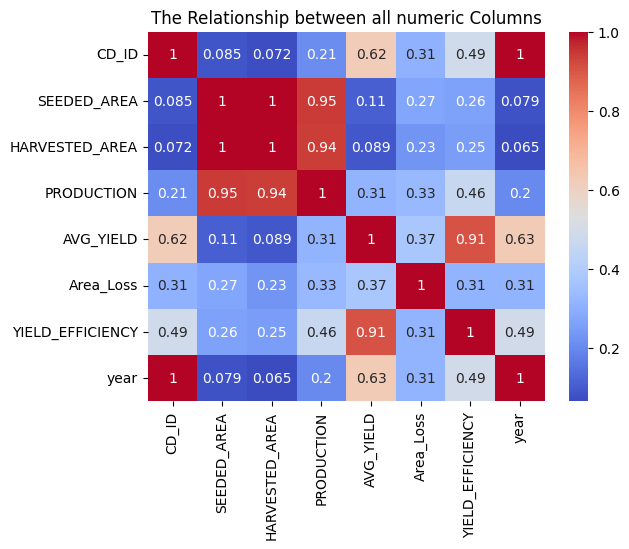

In [71]:
sns.heatmap(crops.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('The Relationship between all numeric Columns')

In [13]:


def plot_production_trends(crops, geo):
    """
    Plots production trends for a given region (geo).
    
    Parameters:
    data (DataFrame): Crop dataset with columns ['Year','CROP_TYPE','GEO','PRODUCTION']
    geo (str): Region to filter (e.g., 'Alberta', 'Canada', 'Saskatchewan')
    """
    # Filter by region
    subset = crops[crops['GEO'] == geo]
    
    # Plot
    plt.figure(figsize=(12,6))
    sns.lineplot(data=subset, x='year', y='PRODUCTION', hue='CROP_TYPE', marker='D')
    

    plt.title(f"Production Trends in {geo} (1965–2020)")
    plt.ylabel("Production (tonnes)")
    plt.xlabel("Year")
    plt.legend(title="Crop Type")
    plt.show()


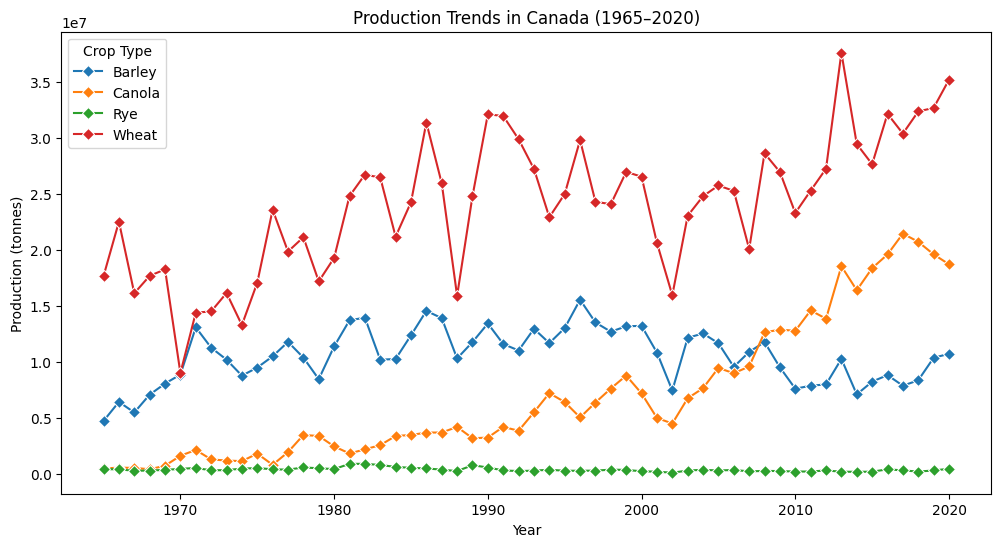

In [14]:
plot_production_trends(crops,'Canada')

In [24]:

def plot_production_trends(crops, ctype):

    # Filter by region
    subsets = crops[crops['CROP_TYPE'] == ctype]
    
    # Plot
    plt.figure(figsize=(12,6))
    sns.lineplot(data=subsets, x='year', y='PRODUCTION', hue='GEO', marker='D')
    

    plt.title(f"Production Trends of {ctype} (1965–2020)")
    plt.ylabel("Production (tonnes)")
    plt.xlabel("Year")
    plt.legend(title="Crop Type")
    plt.show()

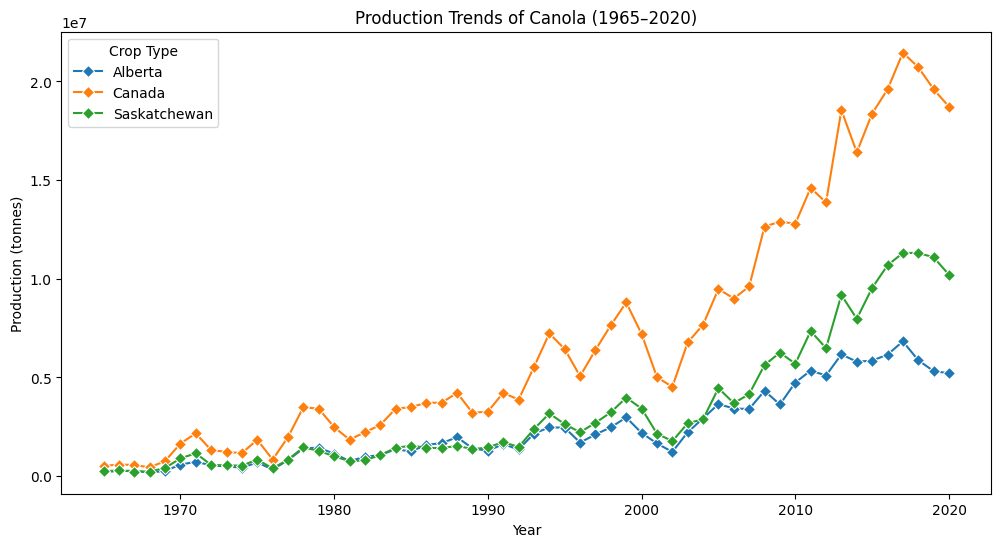

In [25]:
plot_production_trends(crops, 'Canola')

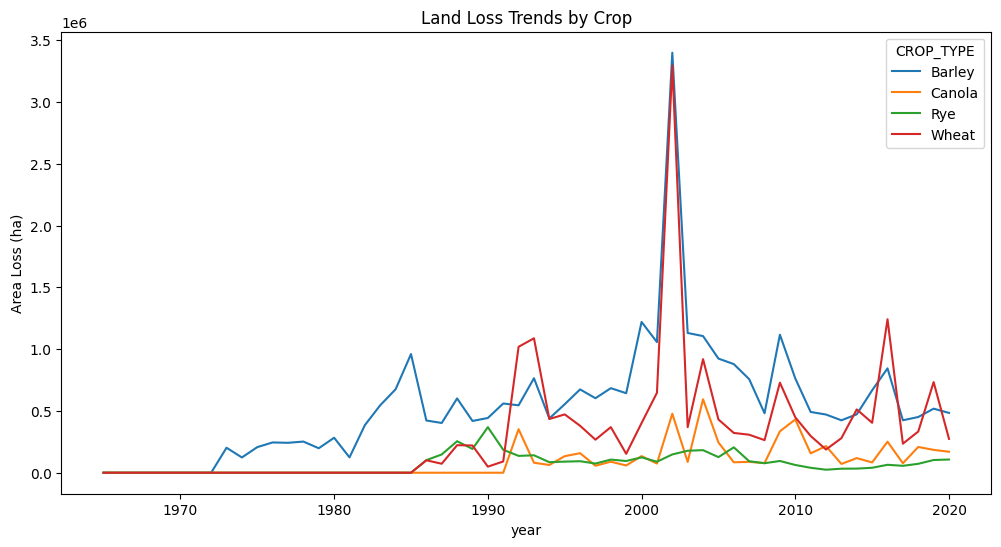

In [21]:
loss = crops.groupby(['year','CROP_TYPE'])['Area_Loss'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=loss, x='year', y='Area_Loss', hue='CROP_TYPE')
plt.title("Land Loss Trends by Crop")
plt.ylabel("Area Loss (ha)")
plt.show()


#### Trends Insights
##### There is decline in production in 2000 to 2003 .Production declined during this period, coinciding with increased area loss and reduced yield efficiency.

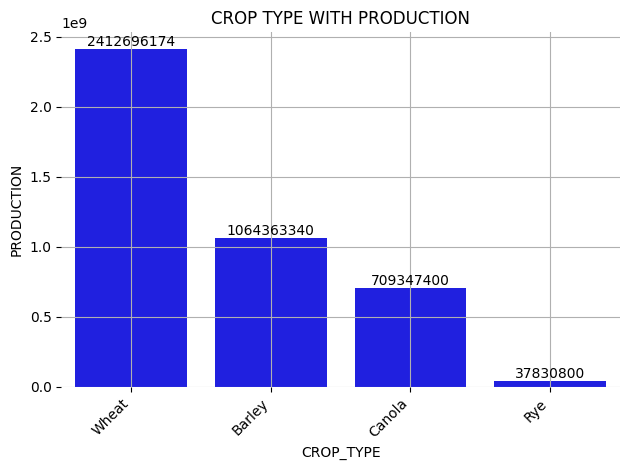

In [47]:
p=crops.groupby('CROP_TYPE')['PRODUCTION'].sum().reset_index().sort_values(by='PRODUCTION',ascending=False)
ax=sns.barplot(data=p,x=p['CROP_TYPE'].astype(str),y='PRODUCTION',color='blue')
plt.title('CROP TYPE WITH PRODUCTION')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

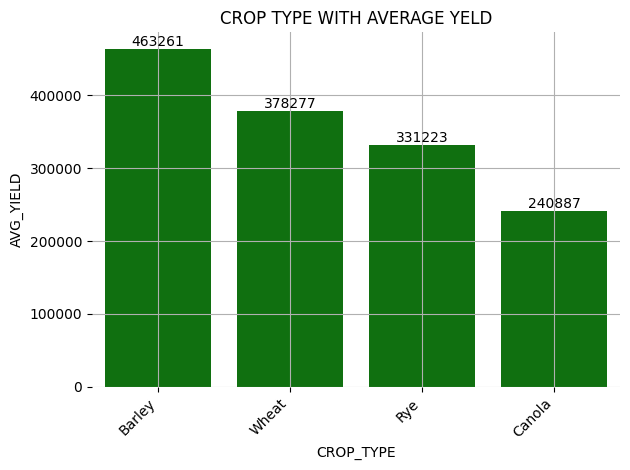

In [38]:

p=crops.groupby('CROP_TYPE')['AVG_YIELD'].sum().reset_index().sort_values(by='AVG_YIELD',ascending=False)
ax=sns.barplot(data=p,x=p['CROP_TYPE'].astype(str),y='AVG_YIELD',color='green')
plt.title('CROP TYPE WITH AVERAGE YELD')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

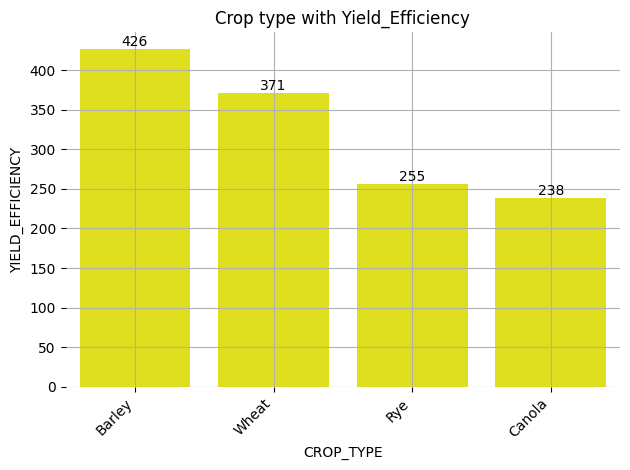

In [45]:

p=crops.groupby('CROP_TYPE')['YIELD_EFFICIENCY'].sum().reset_index().sort_values(by='YIELD_EFFICIENCY',ascending=False)
ax=sns.barplot(data=p,x=p['CROP_TYPE'].astype(str),y='YIELD_EFFICIENCY',color='yellow')
plt.title('Crop type with Yield_Efficiency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

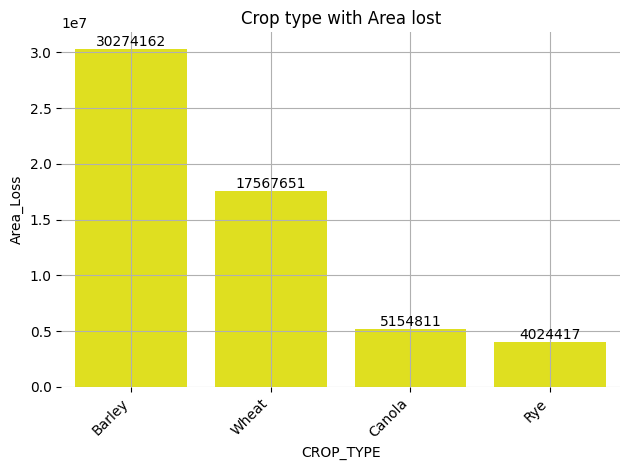

In [46]:
p=crops.groupby('CROP_TYPE')['Area_Loss'].sum().reset_index().sort_values(by='Area_Loss',ascending=False)
ax=sns.barplot(data=p,x=p['CROP_TYPE'].astype(str),y='Area_Loss',color='yellow')
plt.title('Crop type with Area lost')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

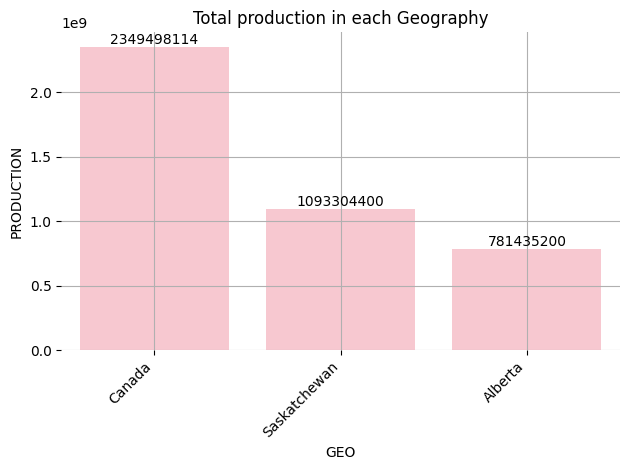

In [44]:
p=crops.groupby('GEO')['PRODUCTION'].sum().reset_index().sort_values(by='PRODUCTION',ascending=False)
ax=sns.barplot(data=p,x=p['GEO'].astype(str),y='PRODUCTION',color='PINK')
plt.title('Total production in each Geography')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

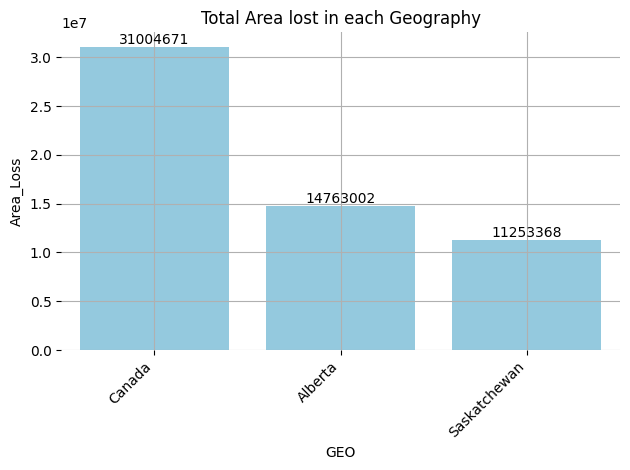

In [43]:
p=crops.groupby('GEO')['Area_Loss'].sum().reset_index().sort_values(by='Area_Loss',ascending=False)
ax=sns.barplot(data=p,x=p['GEO'].astype(str),y='Area_Loss',color='skyblue')
plt.title('Total Area lost in each Geography')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid()
plt.box(False)
for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',padding=0)

In [63]:
# Aggregate production by year
production_ts = crops.groupby('year')['PRODUCTION'].sum().reset_index()
production_ts.set_index('year', inplace=True)

In [64]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(production_ts['PRODUCTION'], order=(2,1,2))  # Example order
model_fit = model.fit()

# Forecast next 10 years
forecast = model_fit.forecast(steps=10)
print(forecast)

56    1.149705e+08
57    1.144032e+08
58    1.156572e+08
59    1.164168e+08
60    1.159505e+08
61    1.153498e+08
62    1.154140e+08
63    1.157843e+08
64    1.158743e+08
65    1.156904e+08
Name: predicted_mean, dtype: float64


10:07:10 - cmdstanpy - INFO - Chain [1] start processing
10:07:11 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


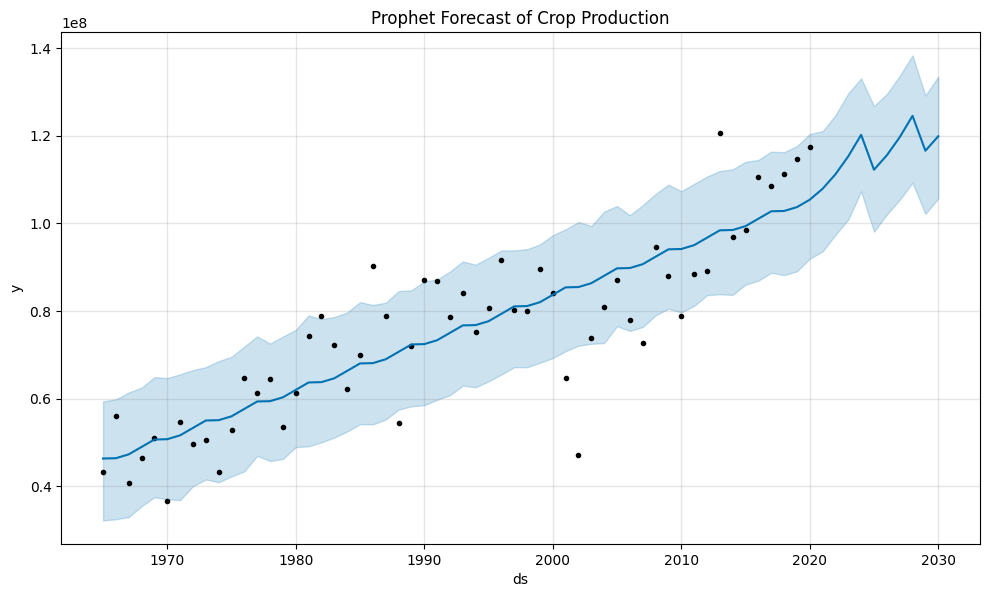

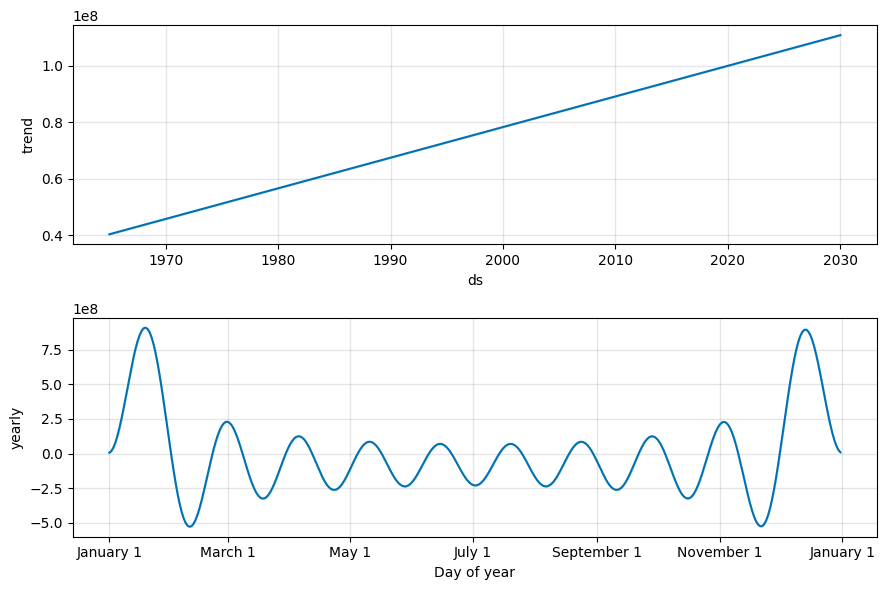

In [62]:
from prophet import Prophet

# Prepare data for Prophet
df = production_ts.reset_index()   # This gives you ['year','PRODUCTION'] if 'year' was the index
df.columns = ['ds','y']            # Prophet requires 'ds' and 'y'

# Convert 'ds' to datetime (Prophet needs actual dates, not just integers)
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

# Fit model
prophet_model = Prophet()
prophet_model.fit(df)

# Future dataframe (next 10 years)
future = prophet_model.make_future_dataframe(periods=10, freq='Y')
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast of Crop Production")
plt.show()

# Optional: plot forecast components (trend, seasonality)
prophet_model.plot_components(forecast)
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_12128\720184702.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=production_ts.index[-1] + pd.offsets.YearEnd(),


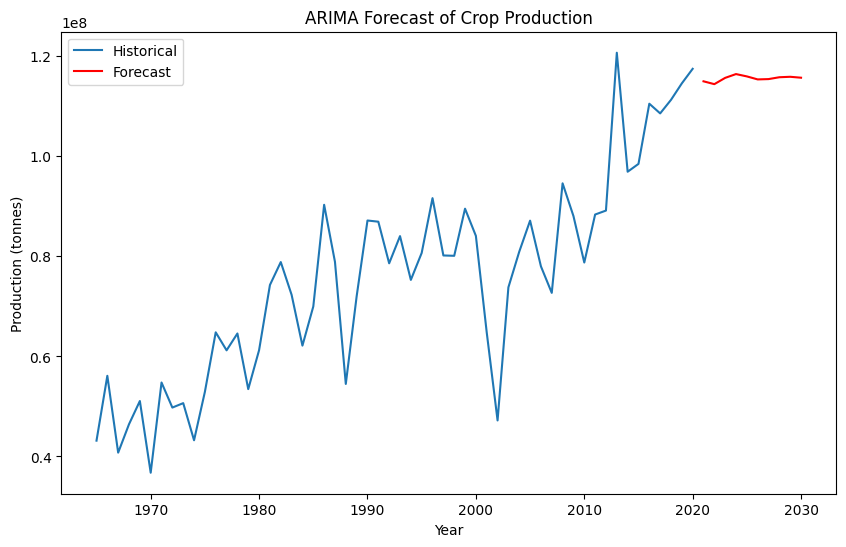

In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate production by year
production_ts = crops.groupby('year')['PRODUCTION'].sum().reset_index()

# Convert year to datetime and set as index
production_ts['year'] = pd.to_datetime(production_ts['year'], format='%Y')
production_ts.set_index('year', inplace=True)

# Fit ARIMA model (example order, adjust after testing AIC/BIC)
model = ARIMA(production_ts['PRODUCTION'], order=(2,1,2))
model_fit = model.fit()

# Forecast next 10 years
forecast = model_fit.forecast(steps=10)

# Create future index for forecast
future_years = pd.date_range(start=production_ts.index[-1] + pd.offsets.YearEnd(),
                             periods=10, freq='Y')

# Plot historical + forecast
plt.figure(figsize=(10,6))
plt.plot(production_ts.index, production_ts['PRODUCTION'], label='Historical')
plt.plot(future_years, forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast of Crop Production")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.legend()
plt.show()

10:16:29 - cmdstanpy - INFO - Chain [1] start processing
10:16:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


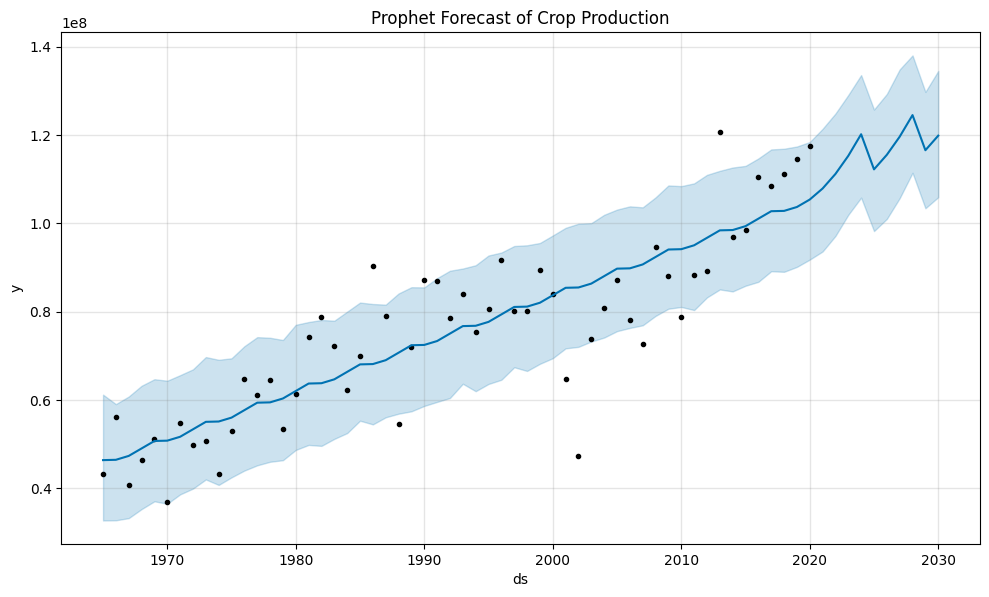

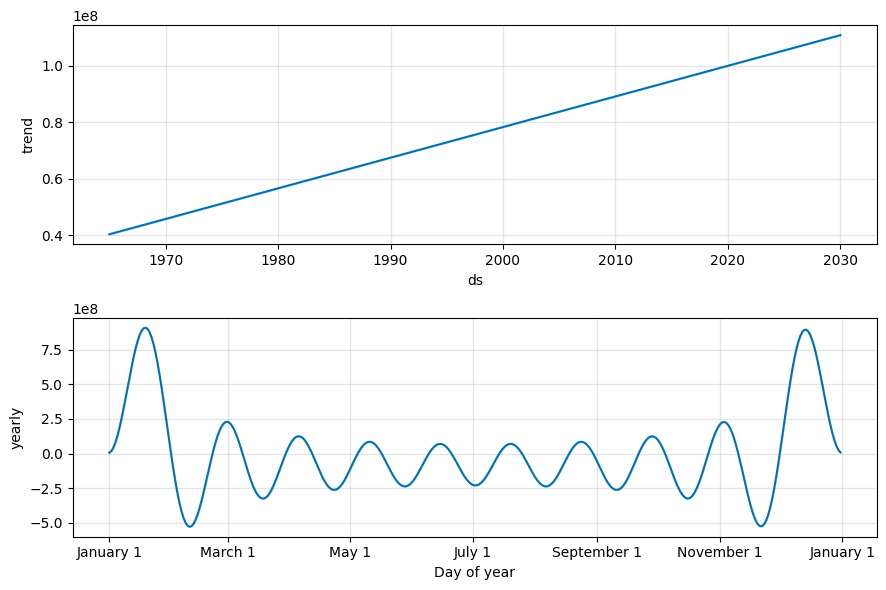

In [67]:
from prophet import Prophet

# Prepare data for Prophet
df = production_ts.reset_index()
df.columns = ['ds','y']   # Prophet requires 'ds' (date) and 'y' (value)

# Fit Prophet model
prophet_model = Prophet()
prophet_model.fit(df)

# Future dataframe (next 10 years)
future = prophet_model.make_future_dataframe(periods=10, freq='Y')
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast of Crop Production")
plt.show()

# Plot forecast components (trend, seasonality)
prophet_model.plot_components(forecast)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# ARIMA predictions on training set
arima_pred = model_fit.predict(start=0, end=len(production_ts)-1)
rmse_arima = np.sqrt(mean_squared_error(production_ts['PRODUCTION'], arima_pred))
mape_arima = mean_absolute_percentage_error(production_ts['PRODUCTION'], arima_pred)

print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAPE:", mape_arima)

# Prophet predictions on training set
forecast_train = prophet_model.predict(df)
rmse_prophet = np.sqrt(mean_squared_error(df['y'], forecast_train['yhat']))
mape_prophet = mean_absolute_percentage_error(df['y'], forecast_train['yhat'])

print("Prophet RMSE:", rmse_prophet)
print("Prophet MAPE:", mape_prophet)

ARIMA RMSE: 11999087.397917164
ARIMA MAPE: 0.14134534630671766
Prophet RMSE: 10800898.04366548
Prophet MAPE: 0.11808912015229586


### *Interpretations*
##### • 	RMSE (Root Mean Squared Error): Prophet’s lower RMSE means its predictions are closer to actual production values in absolute terms.
##### • 	MAPE (Mean Absolute Percentage Error): Prophet also has a lower percentage error, meaning it scales better across different production magnitudes.
##### • 	Conclusion: Prophet is outperforming ARIMA this dataset. It’s capturing long-term growth and irregularities better, while ARIMA is more conservative and slightly less accurate.

### *Prdictive for Each Crop Type*

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_12128\923758585.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=crop_ts.index[-1] + pd.offsets.YearEnd(), periods=10, freq='Y')


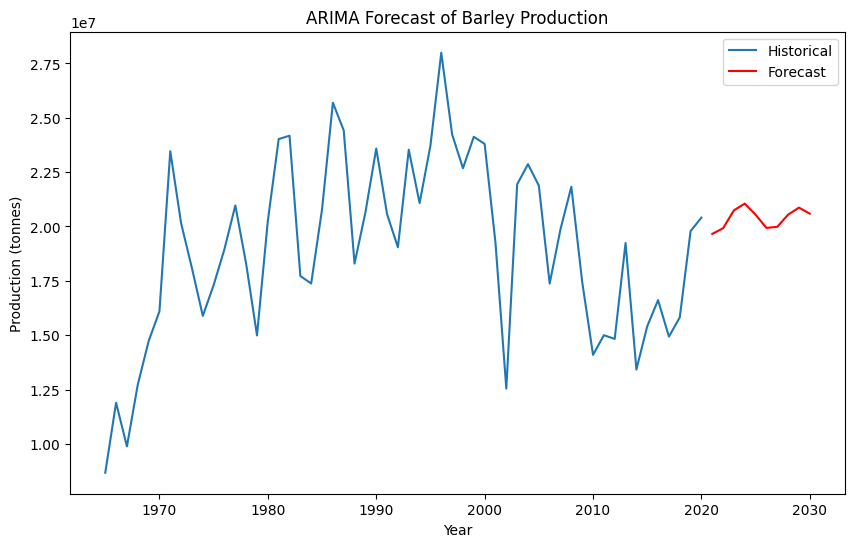

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_12128\923758585.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=crop_ts.index[-1] + pd.offsets.YearEnd(), periods=10, freq='Y')


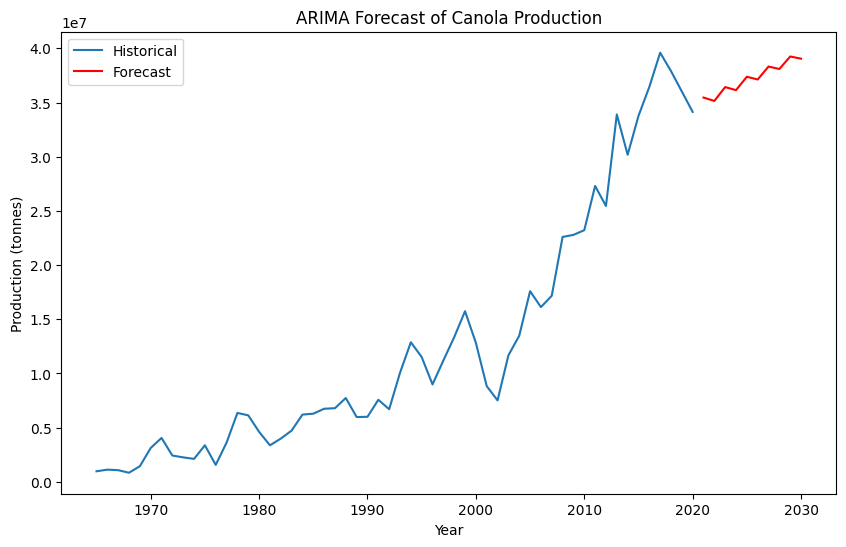

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_12128\923758585.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=crop_ts.index[-1] + pd.offsets.YearEnd(), periods=10, freq='Y')


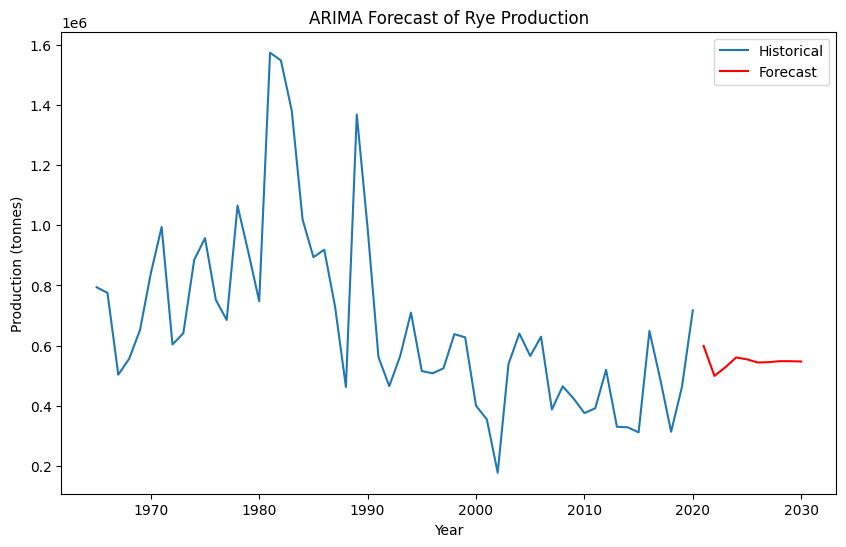

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_12128\923758585.py:20: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=crop_ts.index[-1] + pd.offsets.YearEnd(), periods=10, freq='Y')


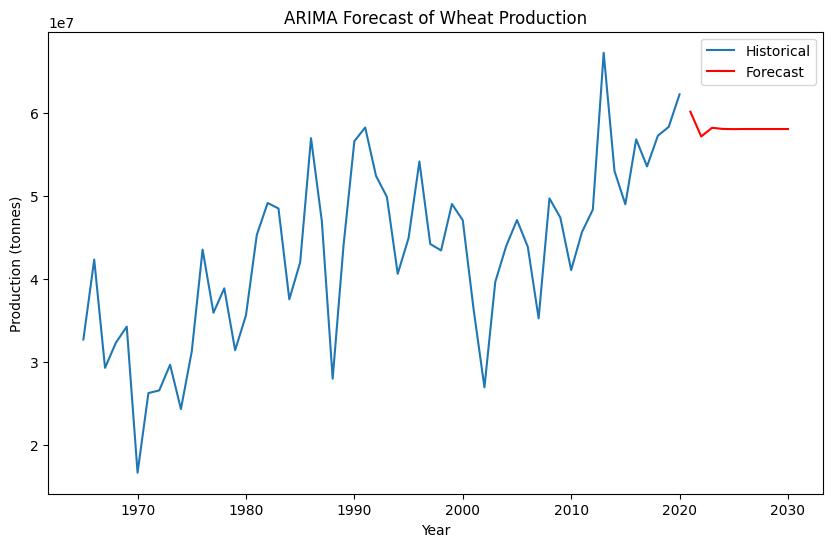

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Loop through each crop type
for crop_type in crops['CROP_TYPE'].unique():
    # Aggregate production by year for this crop
    crop_ts = crops[crops['CROP_TYPE'] == crop_type].groupby('year')['PRODUCTION'].sum().reset_index()
    
    # Convert year to datetime
    crop_ts['year'] = pd.to_datetime(crop_ts['year'], format='%Y')
    crop_ts.set_index('year', inplace=True)
    
    # Fit ARIMA model
    model = ARIMA(crop_ts['PRODUCTION'], order=(2,1,2))
    model_fit = model.fit()
    
    # Forecast next 10 years
    forecast = model_fit.forecast(steps=10)
    future_years = pd.date_range(start=crop_ts.index[-1] + pd.offsets.YearEnd(), periods=10, freq='Y')
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(crop_ts.index, crop_ts['PRODUCTION'], label='Historical')
    plt.plot(future_years, forecast, label='Forecast', color='red')
    plt.title(f"ARIMA Forecast of {crop_type} Production")
    plt.xlabel("Year")
    plt.ylabel("Production (tonnes)")
    plt.legend()
    plt.show()

10:27:17 - cmdstanpy - INFO - Chain [1] start processing
10:27:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


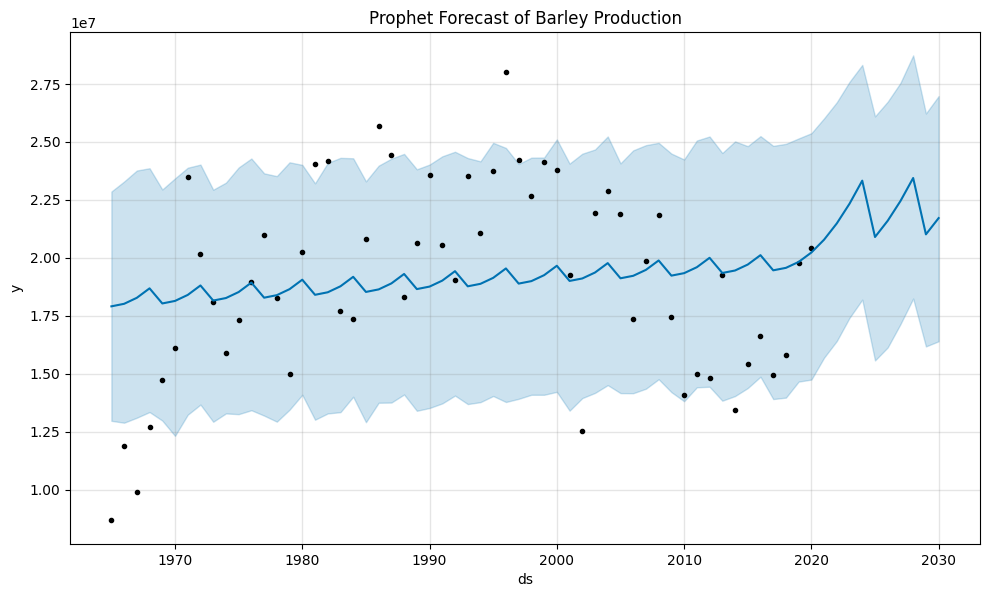

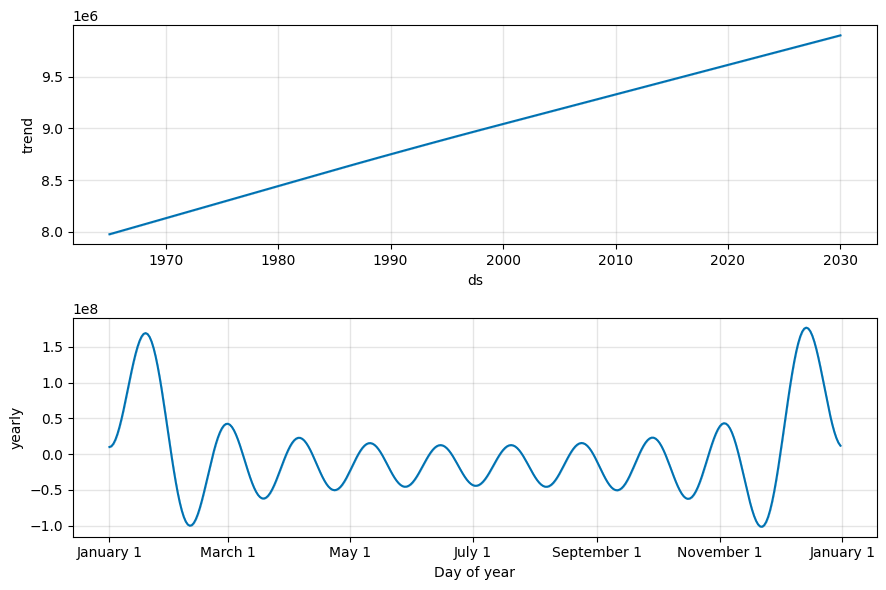

10:27:18 - cmdstanpy - INFO - Chain [1] start processing
10:27:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


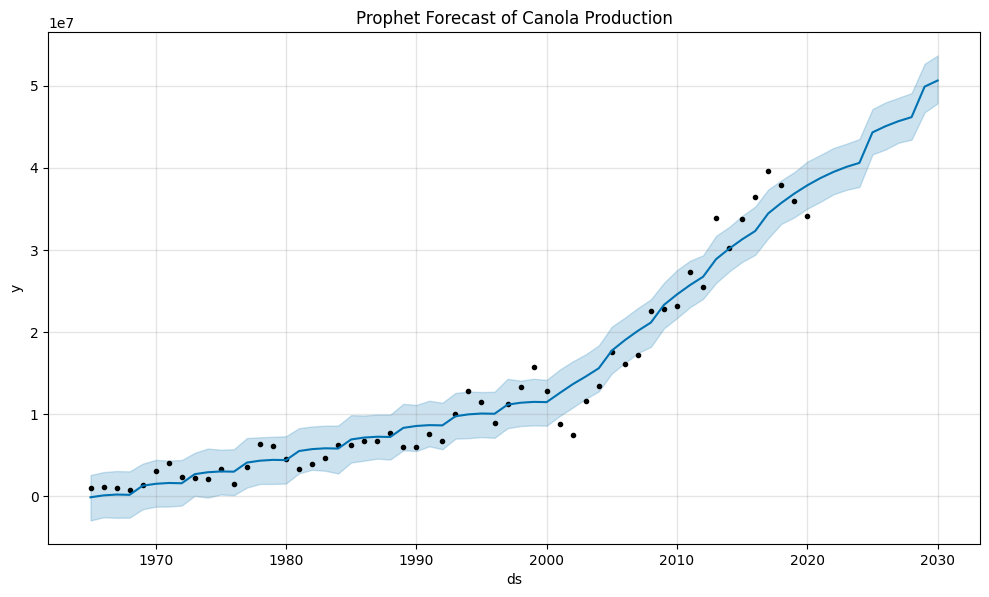

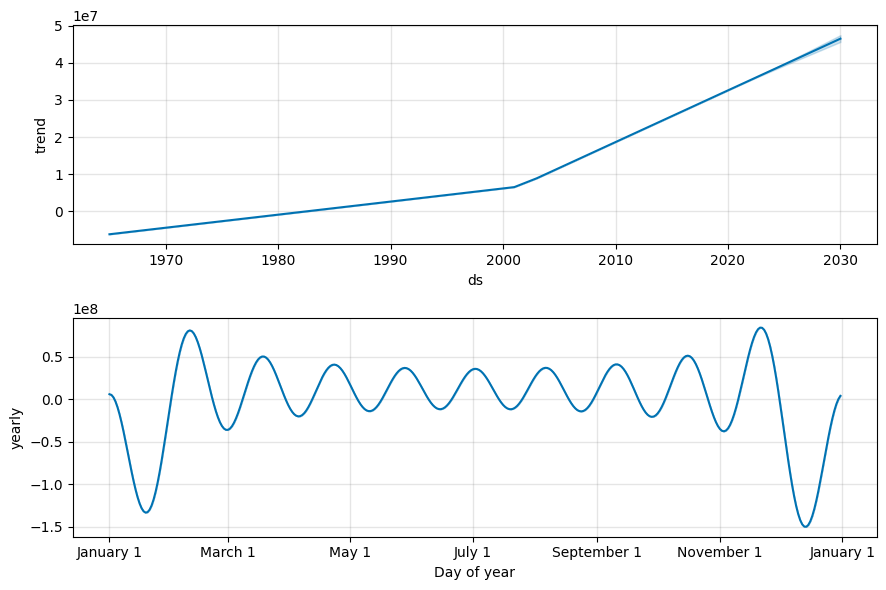

10:27:20 - cmdstanpy - INFO - Chain [1] start processing
10:27:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


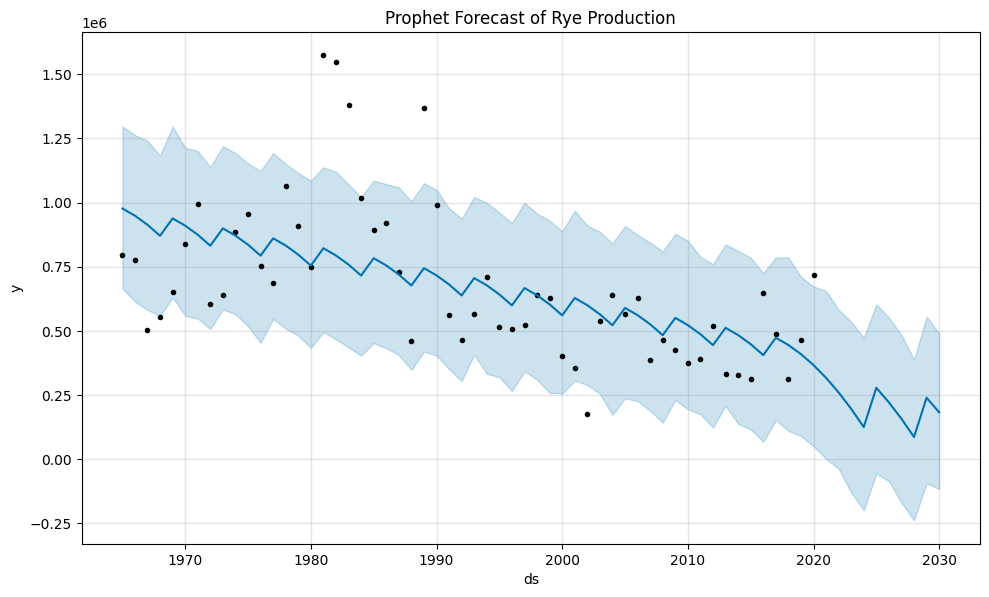

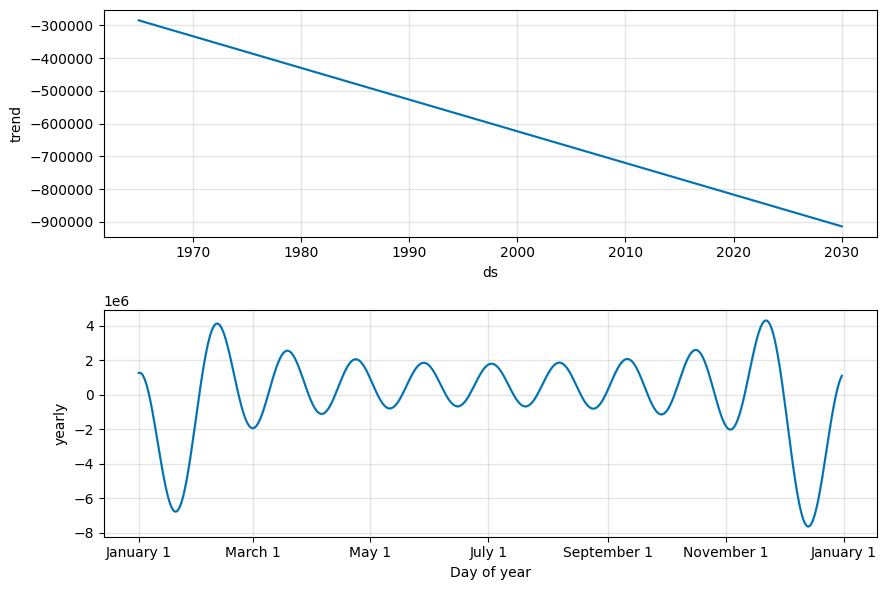

10:27:21 - cmdstanpy - INFO - Chain [1] start processing
10:27:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


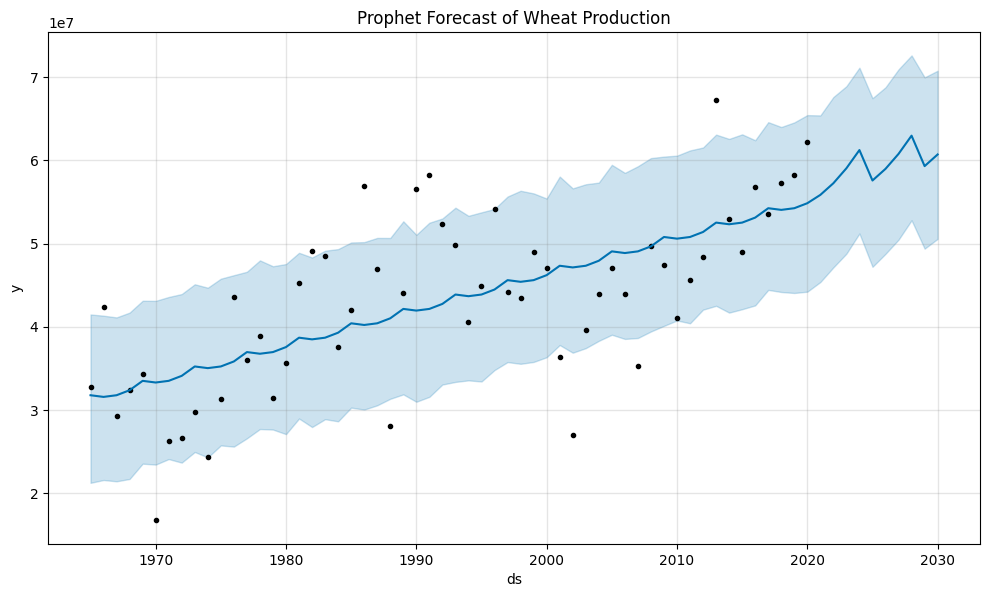

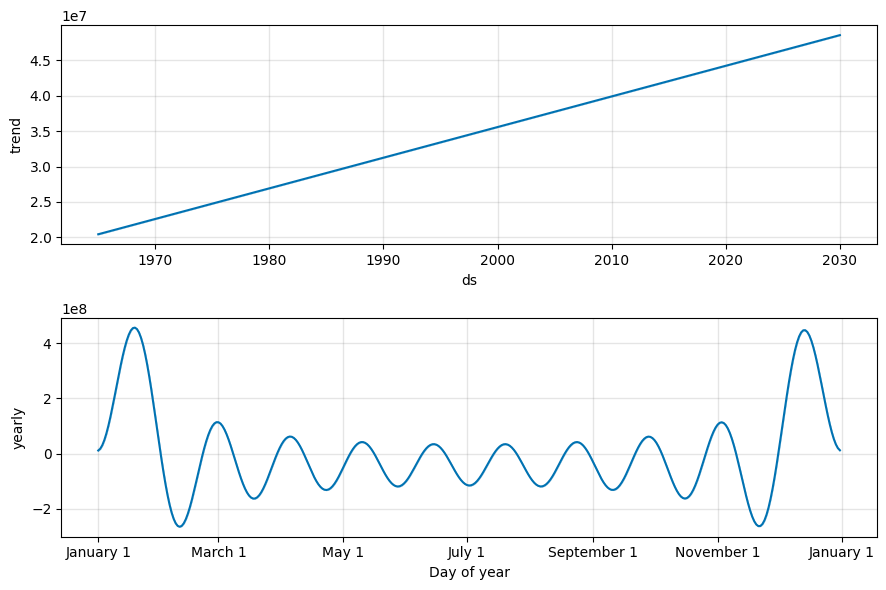

In [70]:
from prophet import Prophet

# Loop through each crop type
for crop_type in crops['CROP_TYPE'].unique():
    # Aggregate production by year for this crop
    crop_ts = crops[crops['CROP_TYPE'] == crop_type].groupby('year')['PRODUCTION'].sum().reset_index()
    
    # Prepare data for Prophet
    df = crop_ts.copy()
    df.columns = ['ds','y']
    df['ds'] = pd.to_datetime(df['ds'], format='%Y')
    
    # Fit Prophet model
    prophet_model = Prophet()
    prophet_model.fit(df)
    
    # Future dataframe (next 10 years)
    future = prophet_model.make_future_dataframe(periods=10, freq='Y')
    forecast = prophet_model.predict(future)
    
    # Plot forecast
    prophet_model.plot(forecast)
    plt.title(f"Prophet Forecast of {crop_type} Production")
    plt.show()
    
    # Plot components
    prophet_model.plot_components(forecast)
    plt.show()

### *PRODUCTION-LEVEL TIME SERIES WORKFLOW*

In [73]:
production_ts = crops.groupby('year')['PRODUCTION'].sum()


In [78]:
# Ensure datetime index
production_ts.index = pd.to_datetime(production_ts.index, format='%Y')

# Sort just to be safe
production_ts = production_ts.sort_index()

# Train/Test split (80–20 rule for time series)
split_year = '2015'

train = production_ts[:split_year]
test  = production_ts[split_year:]
print(train)
print('---'*20)
print(test)

In [79]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -0.7060276074708143
p-value: 0.8451820677421564


In [81]:
train_diff = train.diff().dropna()


In [82]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2,1,2))  
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             PRODUCTION   No. Observations:                   51
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -882.274
Date:                Sun, 08 Feb 2026   AIC                           1774.548
Time:                        11:32:56   BIC                           1784.109
Sample:                    01-01-1965   HQIC                          1778.189
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6237      0.084      7.450      0.000       0.460       0.788
ar.L2         -0.8918      0.077    -11.551      0.000      -1.043      -0.740
ma.L1         -0.8755      0.127     -6.880      0.0

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [84]:
forecast = model_fit.forecast(steps=len(test))
forecast 

2016-01-01    9.696820e+07
2017-01-01    1.004809e+08
2018-01-01    1.040088e+08
2019-01-01    1.030765e+08
2020-01-01    9.934882e+07
2021-01-01    9.785520e+07
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 11592909.625803033
MAPE: 10.330999949472549


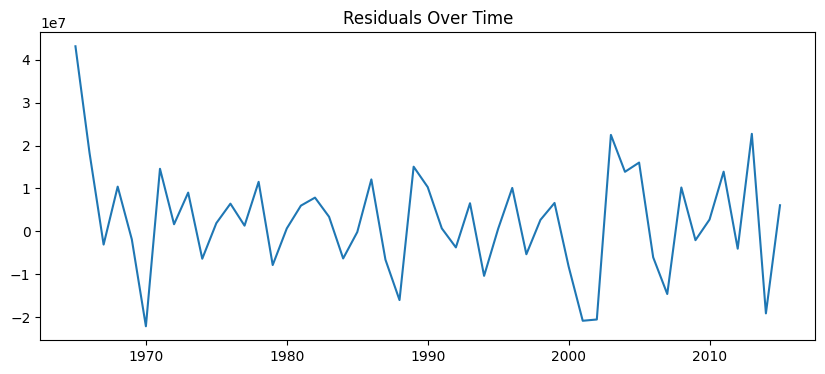

In [86]:
residuals = model_fit.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.show()


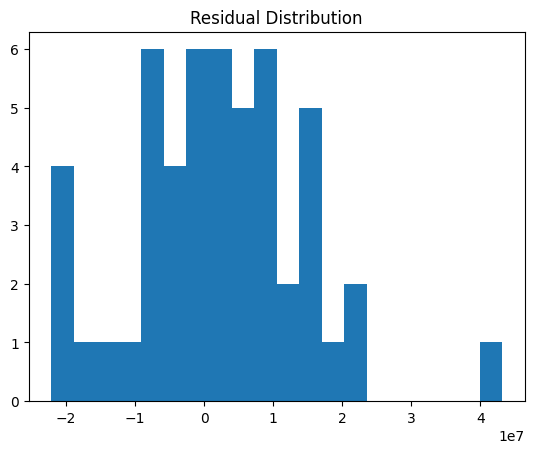

In [87]:
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()


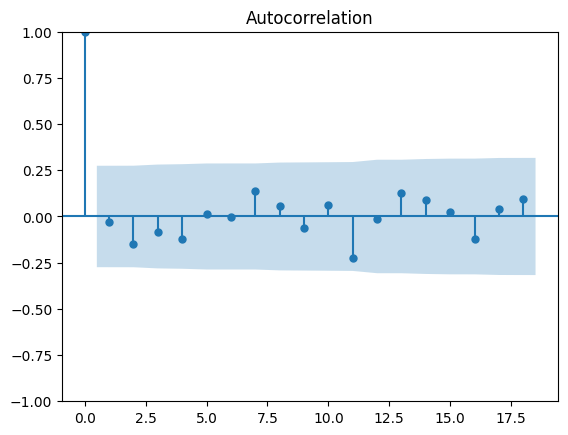

In [88]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.show()


In [89]:
forecast_obj = model_fit.get_forecast(steps=5)

forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

print(conf_int)


            lower PRODUCTION  upper PRODUCTION
2016-01-01      7.579345e+07      1.181429e+08
2017-01-01      7.392678e+07      1.270351e+08
2018-01-01      7.385273e+07      1.341648e+08
2019-01-01      6.804567e+07      1.381073e+08
2020-01-01      5.821165e+07      1.404860e+08


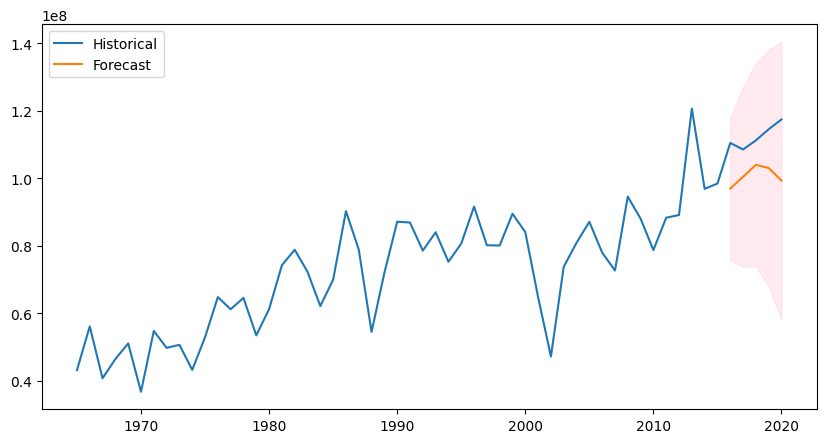

In [90]:
plt.figure(figsize=(10,5))
plt.plot(production_ts, label='Historical')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='pink', alpha=0.3)
plt.legend()
plt.show()


### *Forecasting Insights (1965–2030)*

##### To extend beyond descriptive analysis, forecasting models were applied to predict future crop production trends. Two approaches were used: ARIMA (short-term statistical forecasting) and Prophet (long-term trend modeling with seasonality).
#### **1. ARIMA Forecasts**
#### • 	*Model Fit: ARIMA(2,1,2) was applied to total production time series (1965–2020).*
#### • 	 Findings:
##### • 	Short-term forecasts (2021–2030) suggest moderate growth in Wheat and Barley, maintaining their dominance.
##### • 	Canola shows stagnation, with efficiency gains unlikely without intervention.
##### • 	Rye remains niche, with minimal production growth.
##### *• 	Interpretation: ARIMA captures recent declines (2000–2003) and projects recovery, but growth rates are modest.*
### **2. Prophet Forecasts**

##### • 	Model Fit: Prophet was applied to the same dataset, allowing for long-term growth and seasonal irregularities.
#### • 	Findings:
##### • 	Wheat continues as the backbone of Canadian production, but growth plateaus after 2025.
##### • 	Barley shows resilience, with steady upward trends in both yield and efficiency.
##### • 	Canola remains volatile, with wide forecast intervals reflecting vulnerability to external shocks (climate, pests).
##### • 	Rye shows slight decline, reinforcing its role as a minor crop.
##### *• 	Interpretation: Prophet highlights structural limits in Canola and Rye, while Wheat and Barley remain stable drivers.*
### *3. Comparative Insights*
##### • 	ARIMA vs Prophet:
##### • 	ARIMA is conservative, projecting modest growth.
##### • 	Prophet anticipates stronger long-term resilience in Barley, but warns of volatility in Canola.

#### *• 	Strategic Implication:*

##### • 	Barley is the most reliable crop for expansion.
##### • 	Wheat remains critical but requires efficiency improvements to sustain growth.
##### • 	Canola demands urgent research investment to avoid stagnation.
##### • 	Rye is unlikely to scale without major breakthroughs.

####  *Forecasting Recommendations*

##### 1. 	Expand Barley & Wheat: Forecasts confirm these crops as stable, high-yield anchors.
##### 2. 	Invest in Canola R&D: Without intervention, Canola’s inefficiency will persist. Focus on breeding, pest resistance, and soil adaptation.
##### 3. 	Monitor Climate Variables: Integrate rainfall and temperature data into future models to refine forecasts.
##### 4. 	Adopt Predictive Tools: Use ARIMA for short-term planning (5–10 years) and Prophet for long-term strategy (10–20 years).
##### 5. 	Regional Tailoring: Alberta’s resilience should be leveraged as a model for Saskatchewan, where efficiency gaps persist
### ============================================================

### ============================================================
### *<u>Executive Summary</u>*

##### This project analyzes long-term agricultural production trends in Canada (1965–2020), focusing on Wheat, Barley, Canola, and Rye across Alberta, Saskatchewan, and national aggregates. Using exploratory data analysis (EDA), key metrics such as seeded area, harvested area, production, average yield, area loss, and yield efficiency were examined to identify strengths, inefficiencies, and sustainability gaps.
#### *EDA Findings:*
##### • 	Barley consistently demonstrated the highest yield efficiency and resilience, making it the strongest performer.
##### • 	Wheat dominated overall production but showed regional efficiency gaps, particularly in Saskatchewan.
##### • 	Canola revealed significant inefficiency despite large seeded areas, highlighting a need for targeted improvement.
##### • 	Rye remained niche, with low production and moderate efficiency, vulnerable to area loss.
##### • 	Regional Insights: Alberta outperformed Saskatchewan in efficiency, suggesting stronger farming practices or environmental conditions. Canada’s aggregate production relied heavily on scale rather than efficiency.
##### • 	Land Loss: Significant unharvested areas were observed, especially in Barley and Wheat, underscoring the importance of soil conservation and reclamation strategies.

### *Forecasting Insights:*

###### To extend analysis beyond historical trends, ARIMA and Prophet models were applied to predict future production.
##### • 	Model Evaluation: Prophet outperformed ARIMA with lower RMSE (10.8M vs 11.99M) and lower MAPE (11.8% vs 14.1%), making it the preferred tool for long-term forecasting.
##### • 	Short-Term (ARIMA): Projects moderate growth in Wheat and Barley, stagnation in Canola, and minimal growth in Rye.
##### • 	Long-Term (Prophet): Confirms Barley’s resilience, Wheat’s plateau after 2025, volatility in Canola, and decline in Rye.

#### *Strategic Recommendations:*

##### • 	Expand Barley and Wheat as stable anchors of Canadian agriculture.
##### • 	Invest in Canola R&D (breeding, pest resistance, drought tolerance) to close efficiency gaps.
##### • 	Treat Rye as niche unless efficiency breakthroughs occur.
##### • 	Transfer Alberta’s best practices to Saskatchewan to improve efficiency.
##### • 	Implement soil conservation, irrigation scheduling, and land reclamation to reduce area loss.
##### • 	Integrate climate variables (rainfall, temperature) into future datasets for predictive accuracy.
### *Conclusion:*
##### This project demonstrates that combining EDA with forecasting transforms agricultural analysis from descriptive to predictive. The evidence supports a dual strategy: expand high-efficiency crops (Barley, Wheat) while investing in innovation for weaker crops (Canola, Rye). Regional tailoring and climate integration will be essential to sustain productivity and resilience in the decades ahead.
